<a href="https://colab.research.google.com/github/Abhi-nav0506/Capstone-Project---Bike-Sharing-Demand-Prediction--/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from plotnine import ggplot
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
seoul_bike_data = pd.read_csv('/content/drive/MyDrive/Copy of SeoulBikeData.csv', encoding= 'unicode_escape')

In [ ]:
seoul_bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
seoul_bike_data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
seoul_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
seoul_bike_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
seoul_bike_data1 = seoul_bike_data.copy()

In [ ]:
# feature extraction:

seoul_bike_data1["Date_Hour"] = pd.to_datetime(pd.to_datetime(seoul_bike_data1.Date).dt.strftime('%d/%m/%Y')) #strftime converts date to string, so pd.to_datetime is applied again.

seoul_bike_data1['Date_Hour'] +=  pd.to_timedelta(seoul_bike_data1.Hour, unit='h') # adding hour detail to datetime as per hour given in 'hour' column, using pd.to_timedelta

seoul_bike_data1.set_index('Date_Hour',inplace = True) #setting datetime as index

#extracting various units of time
seoul_bike_data1['Year'] = seoul_bike_data1.index.year
seoul_bike_data1['Month'] = seoul_bike_data1.index.month
seoul_bike_data1['Weekday'] = seoul_bike_data1.index.weekday
seoul_bike_data1['Week'] = seoul_bike_data1.index.week

In [ ]:
pd.set_option('display.max_rows', None)

seoul_bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Weekday,Week
Date_Hour,,,,,,,,,,,,,,,,,,
2017-12-01 00:00:00,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48
2017-12-01 01:00:00,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48
2017-12-01 02:00:00,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48
2017-12-01 03:00:00,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48
2017-12-01 04:00:00,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48


In [ ]:
# rented bike count == 0:

seoul_bike_data1[seoul_bike_data1['Rented Bike Count'] == 0]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Weekday,Week
Date_Hour,,,,,,,,,,,,,,,,,,
2018-04-11 00:00:00,11/04/2018,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,2,15
2018-04-11 01:00:00,11/04/2018,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,2,15
2018-04-11 02:00:00,11/04/2018,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,2,15
2018-04-11 03:00:00,11/04/2018,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,2,15
2018-04-11 04:00:00,11/04/2018,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-09 19:00:00,09/11/2018,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,4,45
2018-11-09 20:00:00,09/11/2018,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,4,45
2018-11-09 21:00:00,09/11/2018,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,4,45


In [ ]:
seoul_bike_data1['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# functioning day & rented bike count == 0
seoul_bike_data1[seoul_bike_data1['Rented Bike Count'] == 0]['Functioning Day'].unique()

array(['No'], dtype=object)

In [ ]:
# functioning day & rented bike count != 0
seoul_bike_data1[seoul_bike_data1['Rented Bike Count'] != 0]['Functioning Day'].unique()

array(['Yes'], dtype=object)

#### Rented Bike Count is zero for the days when the service provider was not functioning. Removing these records for Linear Regression will be beneficial.

In [ ]:
#seoul_bike_data1 = seoul_bike_data1.drop(seoul_bike_data1[ ( seoul_bike_data1['Functioning Day'] == 'No') ].index)
#seoul_bike_data1.shape

(8465, 18)

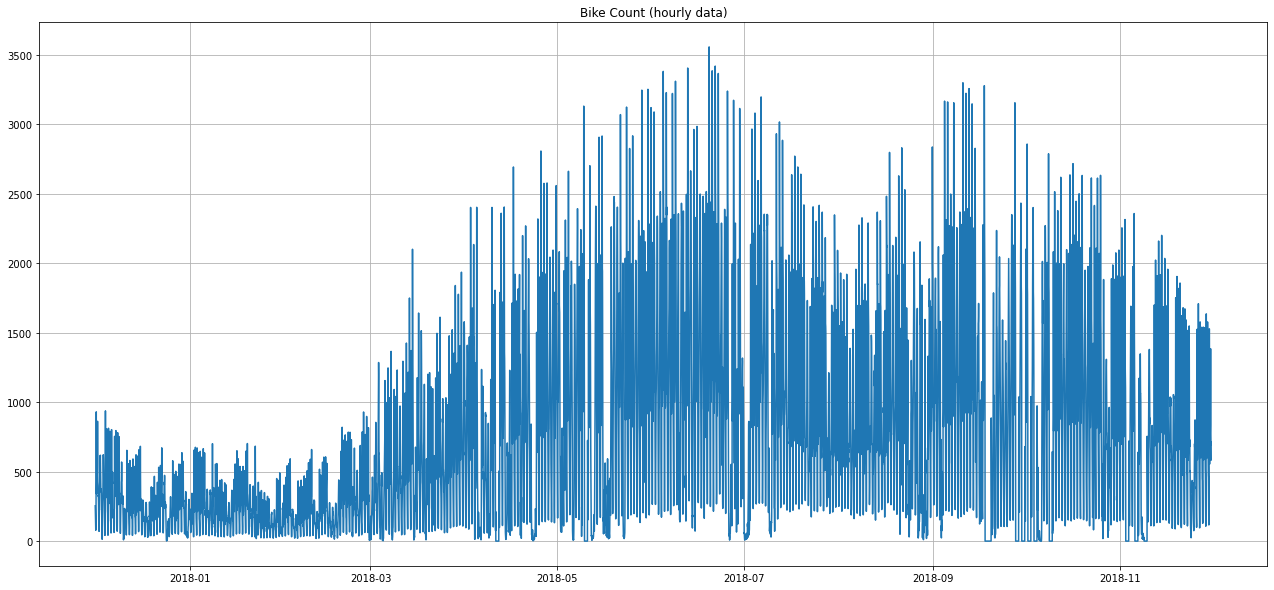

In [ ]:
plt.figure(figsize=(22, 10))
plt.plot(seoul_bike_data1['Rented Bike Count'])
plt.title('Bike Count (hourly data)')
plt.grid(True)
plt.show()

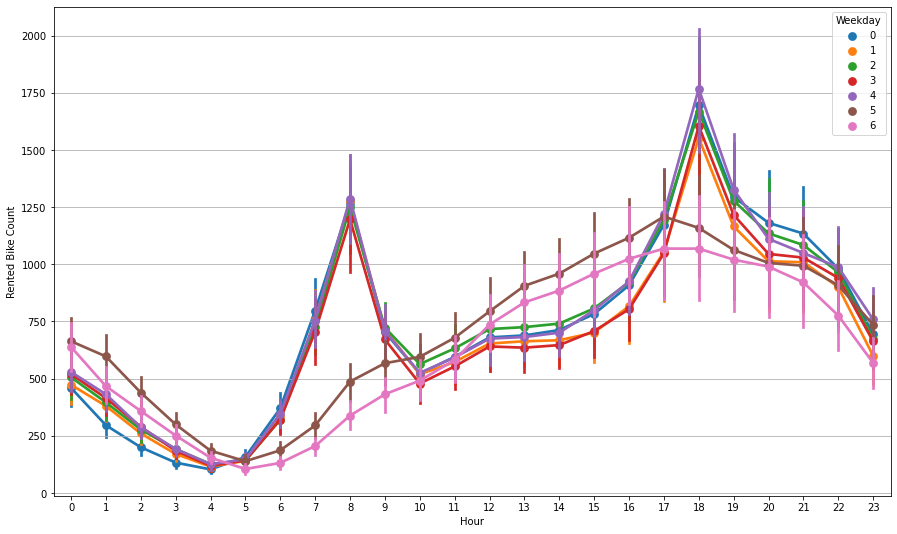

In [ ]:
plt.figure(figsize=(15, 9))
plt.grid(True)
sns.pointplot(x= seoul_bike_data1['Hour'], y=seoul_bike_data1['Rented Bike Count'], hue = seoul_bike_data1['Weekday'])

plt.show()
plt.close()

#### Normal weekdays, i.e. Monday to Friday (0 to 4) behave in a similar pattern through the 24 hours of the day, whereas the weekends, i.e. Saturday & Sunday (5 & 6) behave similary.
#### Hence, demand on normal weekdays is different from that on weekends.

In [ ]:
# adding is_weekend 0/1  catagorical variable

seoul_bike_data1['is_weekend'] = seoul_bike_data1['Weekday'].apply(lambda x : 1 if x in [5,6] else 0)

# converting Functioning Day to binary:

seoul_bike_data1['Functioning Day'] = seoul_bike_data1['Functioning Day'].apply(lambda x : 1 if x =='Yes' else 0)

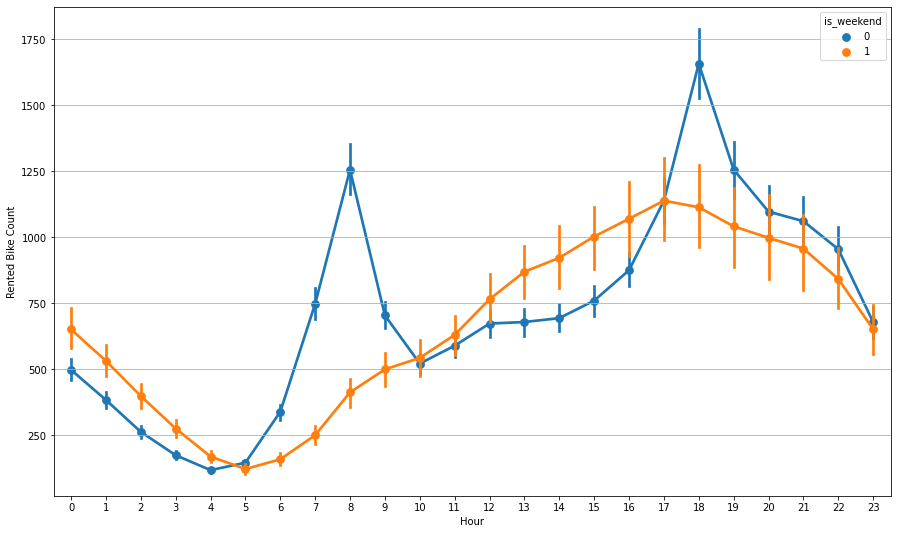

In [ ]:
plt.figure(figsize=(15, 9))
plt.grid(True)
sns.pointplot(x= seoul_bike_data1['Hour'], y=seoul_bike_data1['Rented Bike Count'], hue = seoul_bike_data1['is_weekend'])

plt.show()
plt.close()

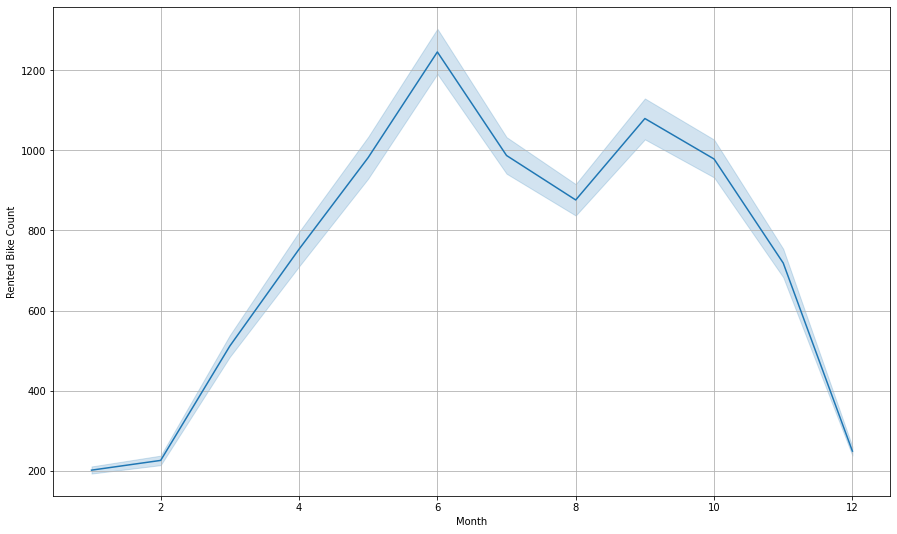

In [ ]:
plt.figure(figsize=(15, 9))
plt.grid(True)
sns.lineplot(x= seoul_bike_data1['Month'], y=seoul_bike_data1[seoul_bike_data1['Rented Bike Count'] != 0]['Rented Bike Count'])

plt.show()
plt.close()

In [ ]:
month_demand_level_df = seoul_bike_data1[seoul_bike_data1['Functioning Day'] != 0].groupby(['Month'])[['Rented Bike Count']].mean().rename(columns = {'Rented Bike Count':'Month Demand Level'}).reset_index()
month_demand_level_df['Month Demand Level'] = month_demand_level_df['Month Demand Level'].apply(lambda x: 1 if 200<= x <400 else (2 if 400<=x<600 else (3 if 600<=x<800 else (4 if 800<=x<1000 else (5 if 1000<=x<1200 else 6) ))))
month_demand_level_df

,Month,Month Demand Level
0,1,1
1,2,1
2,3,2
3,4,3
4,5,4
5,6,6
6,7,4
7,8,4
8,9,5
9,10,4


In [ ]:
seoul_bike_data1 = pd.merge(seoul_bike_data1,month_demand_level_df,how='left',left_on='Month',right_on='Month')

In [ ]:
seoul_bike_data1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Weekday,Week,is_weekend,Month Demand Level
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48,0,1


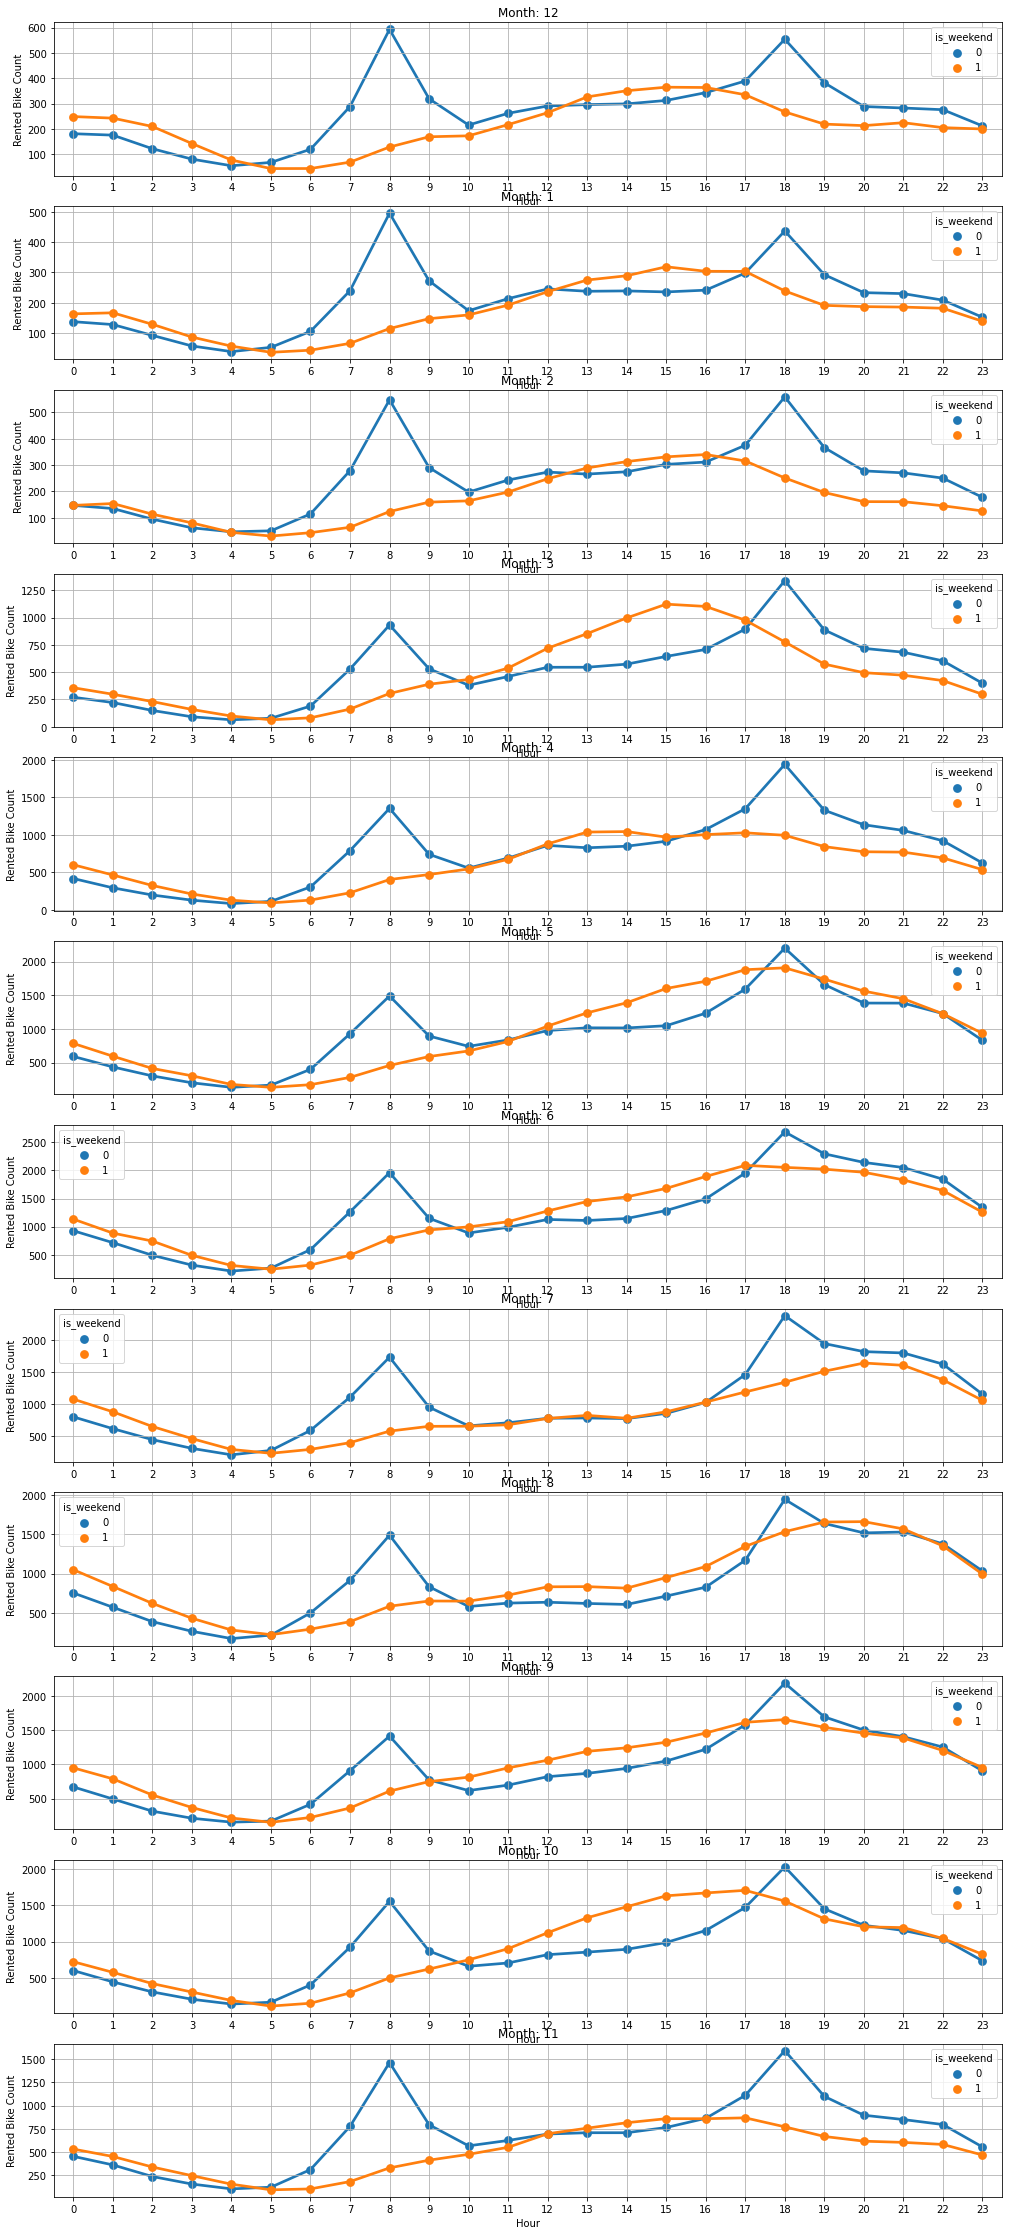

In [ ]:
seasonal_df = pd.DataFrame(seoul_bike_data1.groupby(['Month','is_weekend','Hour'])['Rented Bike Count'].mean()).reset_index()

weekdays = [0,1,2,3,4,5,6]

#seasons = ['Winter','Spring','Summer','Autumn']
months = [12,1,2,3,4,5,6,7,8,9,10,11] 

fig, ax = plt.subplots(12, 1, figsize=(17,40))

a = 0

for month in months:
  season_df = seasonal_df[seasonal_df['Month'] == month]
  sns.pointplot(x= season_df['Hour'], y=season_df['Rented Bike Count'], hue = season_df['is_weekend'], ax = ax[a])
  ax[a].grid()
  season_name = 'Month: ' + str(month)
  ax[a].set_title(season_name)
  a += 1


#### The relation between hour of day and bike demand for every month is different and non monotonic, i.e. it increases & decreases through the day. So hour variable needs to be converted into bins / window.

In [ ]:
#creating hour window
seoul_bike_data1['hour_window'] = seoul_bike_data1['Hour'].apply(lambda x: '0-2' if x in [0,1,2] else ('3-5' if x in [3,4,5] else ('6-8' if x in [6,7,8] else ('9-11' if x in [9,10,11] else ('12-14' if x in [12,13,14] else ('15-17' if x in [15,16,17] else ('18-20' if x in [18,19,20] else'21-23')))))))

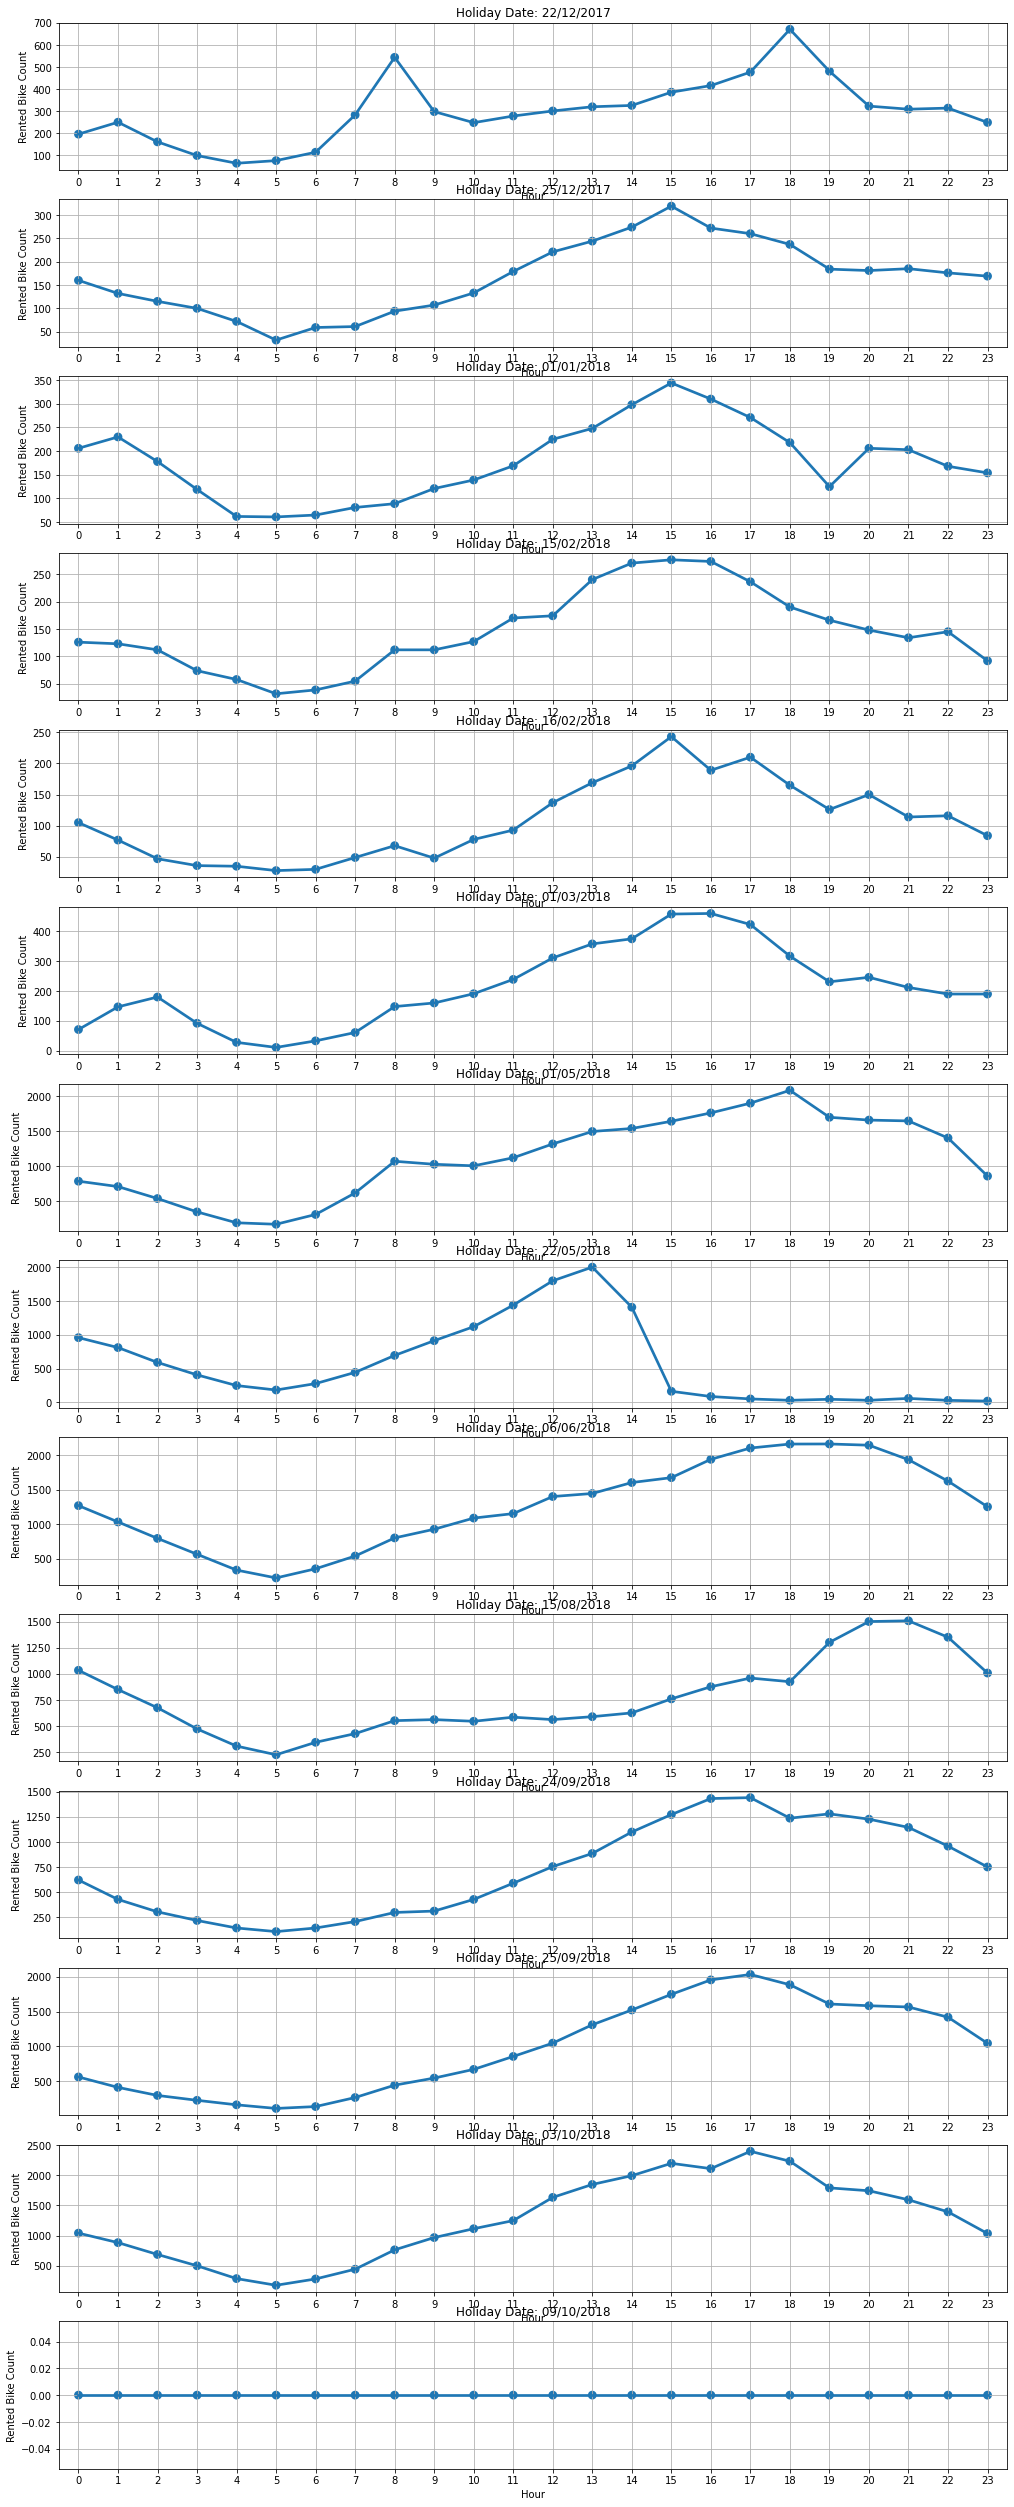

In [ ]:
holidates = list(seoul_bike_data1[(seoul_bike_data1['Holiday']== 'Holiday') & (seoul_bike_data1['is_weekend']== 0)].Date.unique())

fig, ax = plt.subplots(len(holidates), 1, figsize=(17,45))

a = 0

for date in holidates:
  holidate_df = seoul_bike_data1[seoul_bike_data1['Date'] == date]
  sns.pointplot(x= holidate_df['Hour'], y=holidate_df['Rented Bike Count'],  ax = ax[a])
  ax[a].grid()
  season_name = 'Holiday Date: ' + str(date)
  ax[a].set_title(season_name)
  a += 1

#### Holiday date doesn't seems to be 22/12/2017 doesn't seem to be a holiday as there are spikes around 8 am and 6 pm like the regular weekdays. This needs to be categorised as 'no holiday'.

#### The remaining non weekend holidays have the pattern similar to weekends of the respective months they fall into, except for 09/10/2018 which is a 'non functioning day'.

#### So, we should club these together with weekends like 'is_holiday_or_weekend', as a binary variable.

In [ ]:
# replacing holiday with no-holiday for 22/12/2017
seoul_bike_data1["Holiday"] = np.where(seoul_bike_data1["Date"] == "22/12/2017", "No Holiday", seoul_bike_data1["Holiday"])

seoul_bike_data1['is_weekend_or_holiday'] = seoul_bike_data1['Weekday'].apply(lambda x: 1 if x in [5,6] else 0)
seoul_bike_data1['is_weekend_or_holiday'] = np.where(seoul_bike_data1['Holiday'] == 'Holiday', 1,seoul_bike_data1['is_weekend_or_holiday'])

In [ ]:
numeric_features = seoul_bike_data1.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Year',
       'Month', 'Weekday', 'Week', 'is_weekend', 'Month Demand Level',
       'is_weekend_or_holiday'],
      dtype='object')

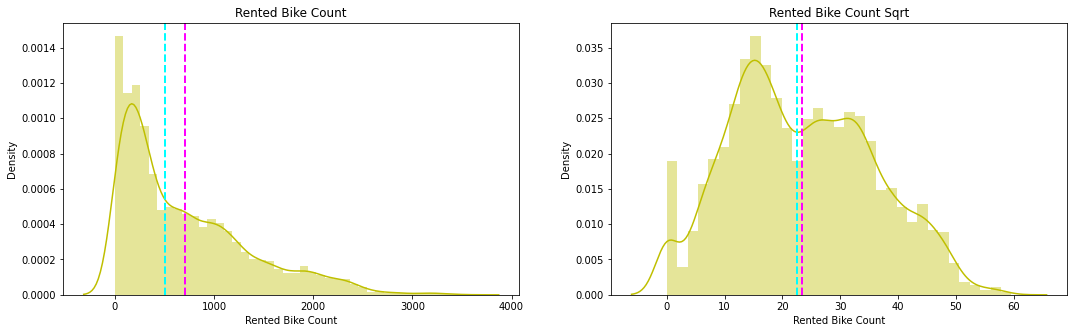

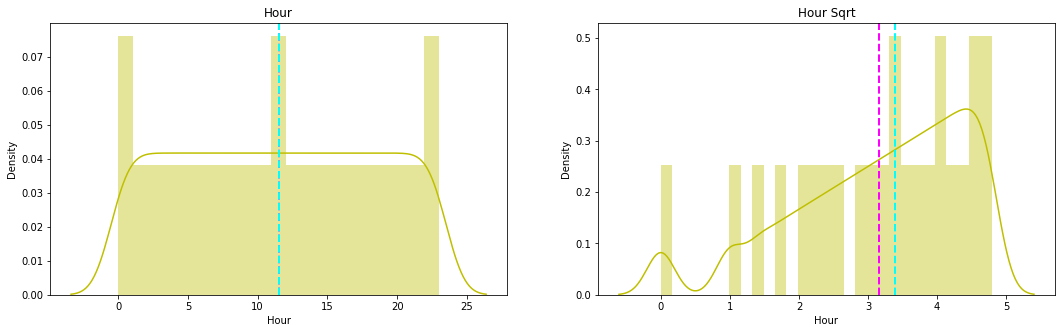

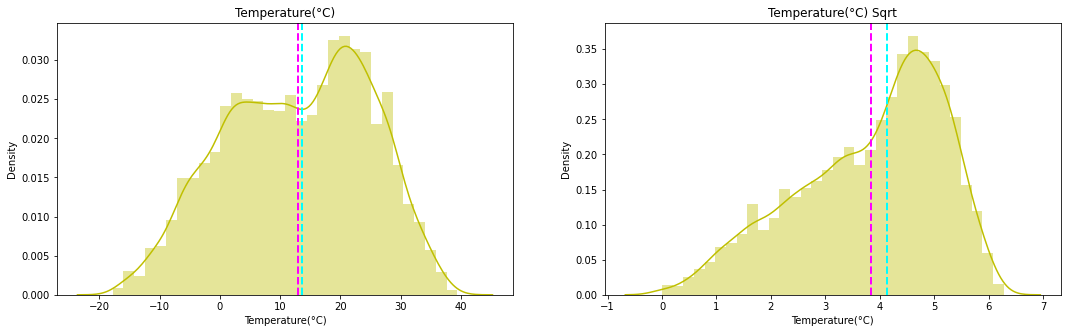

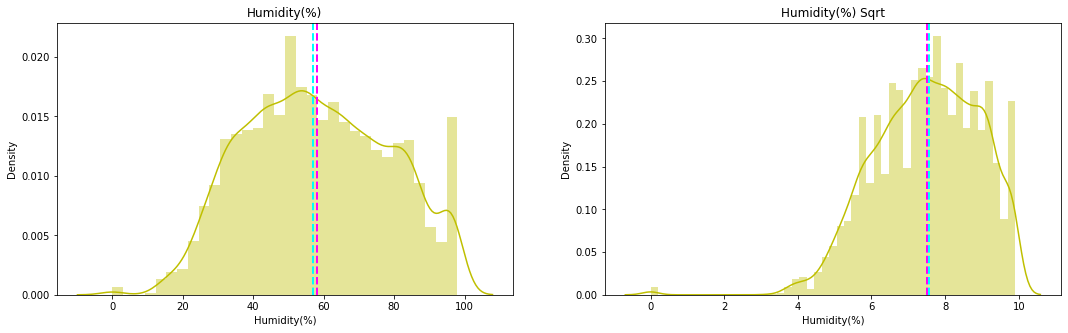

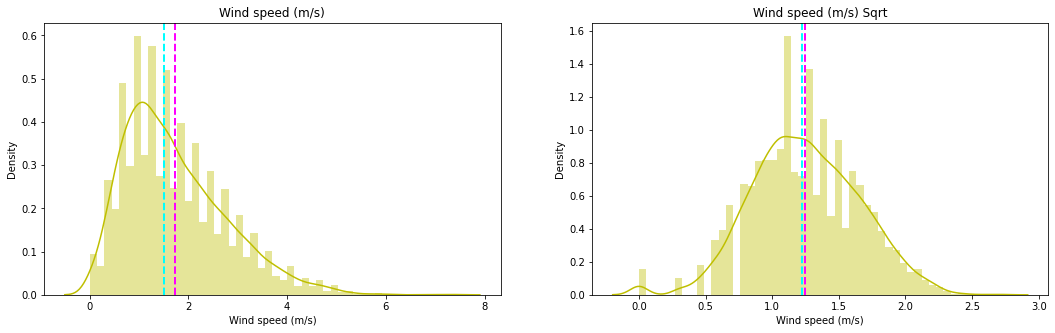

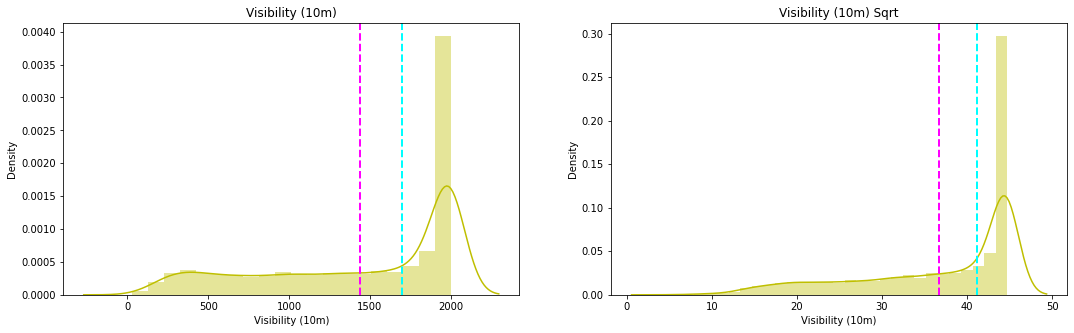

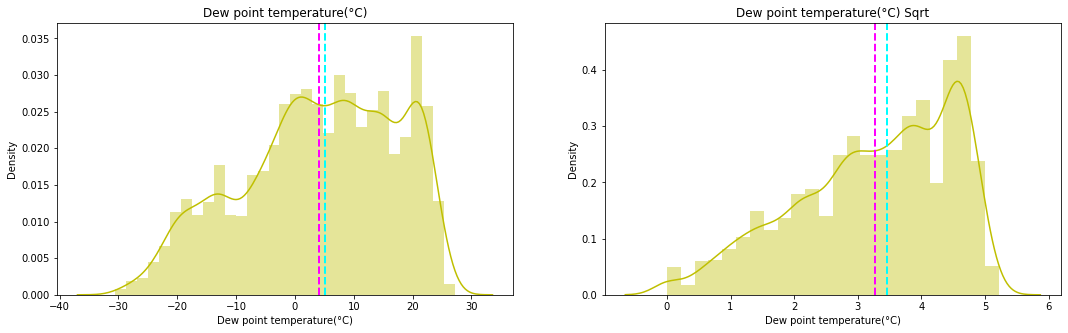

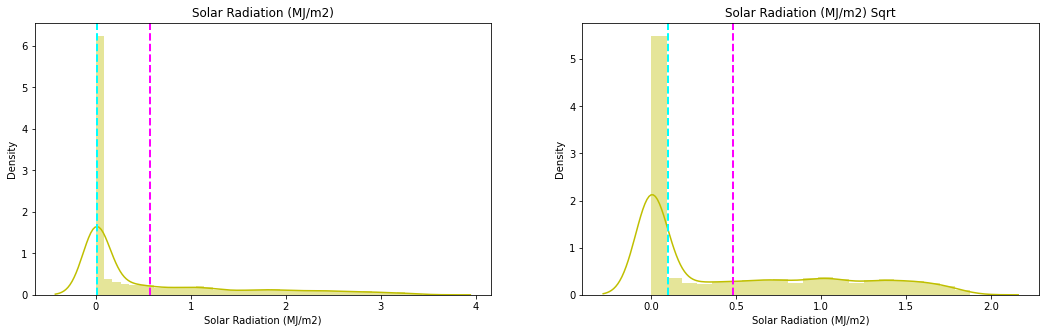

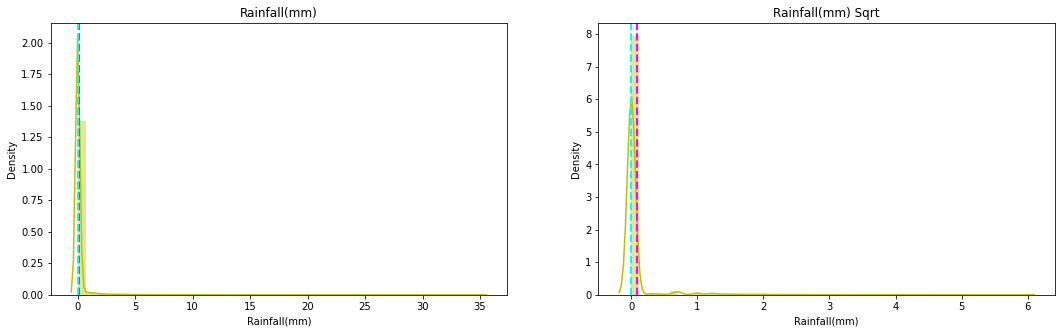

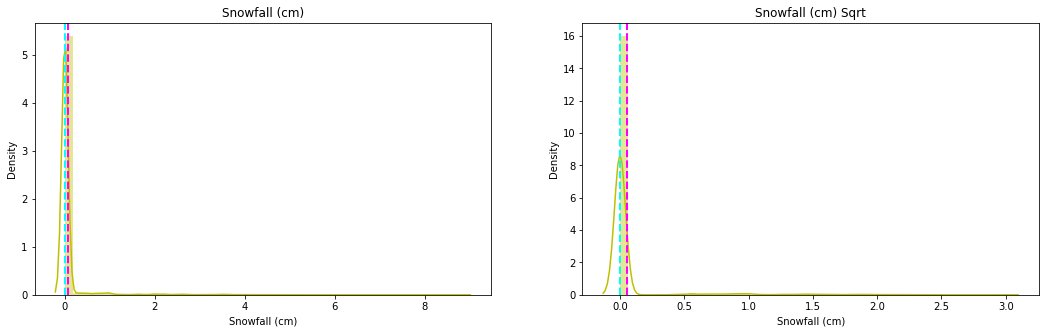

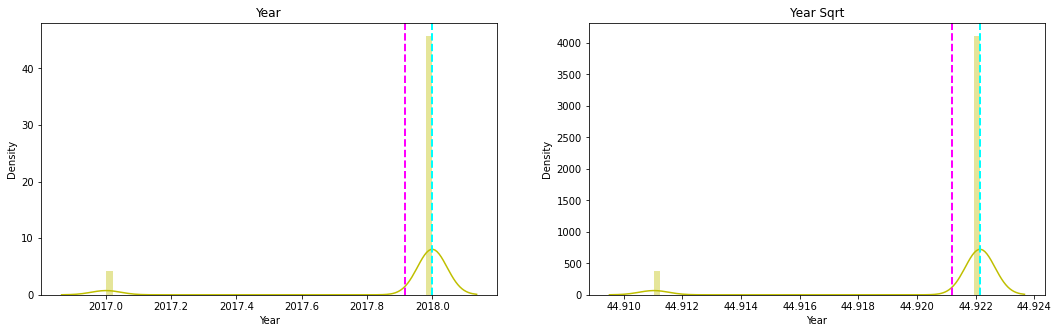

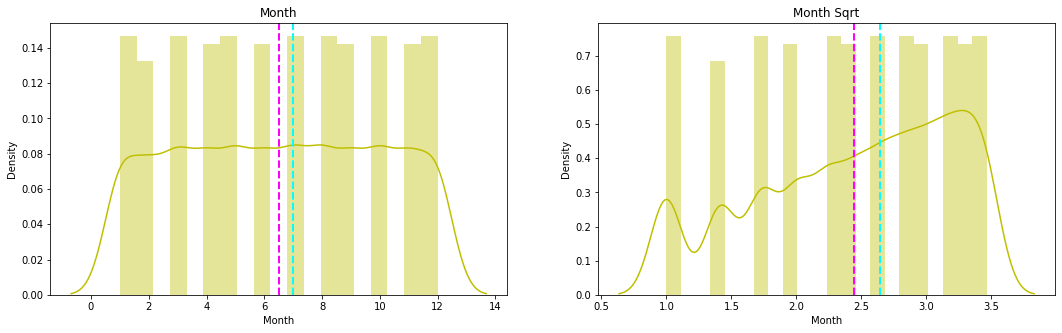

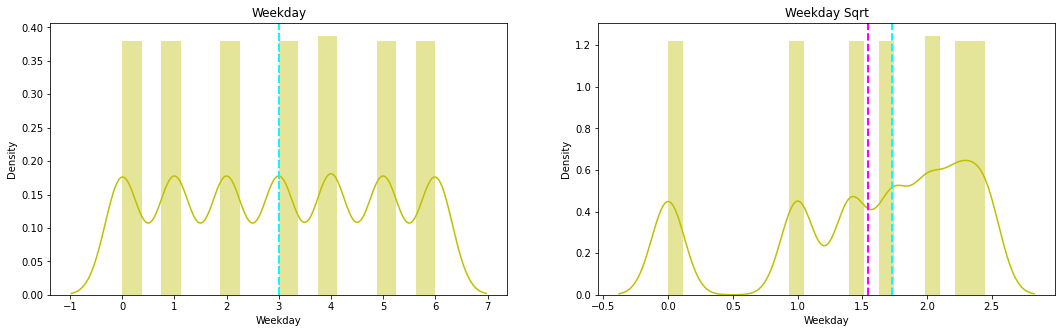

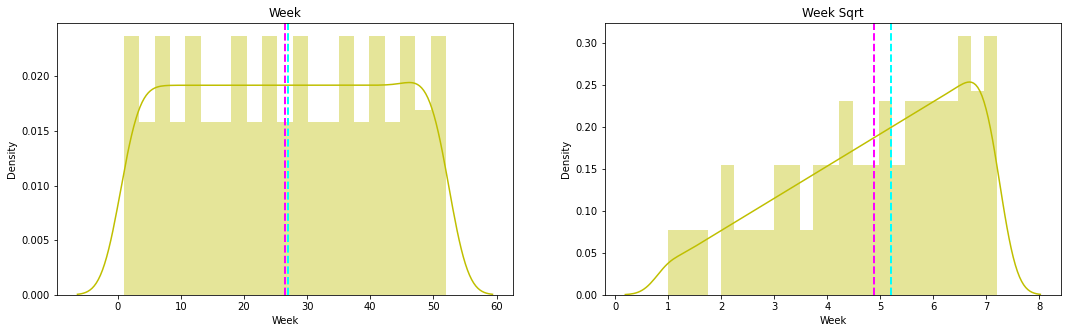

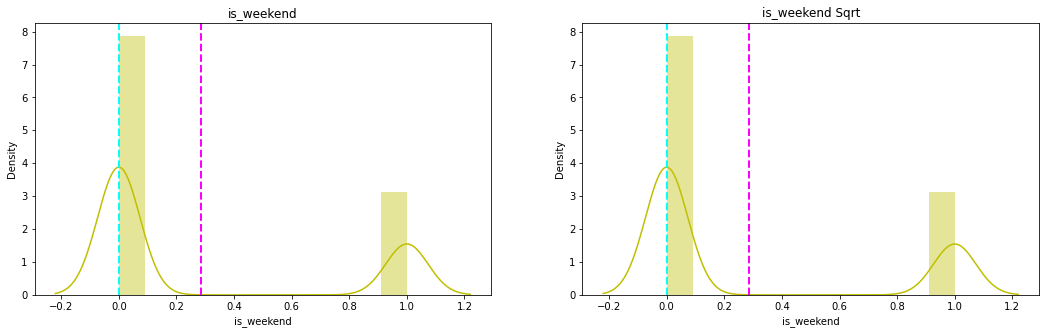

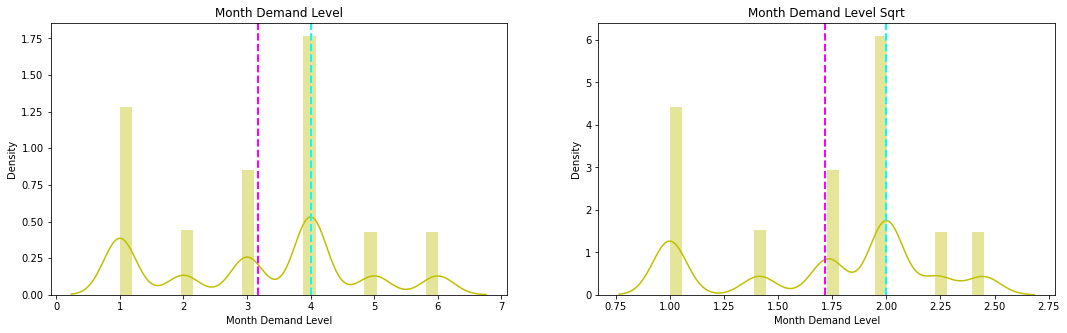

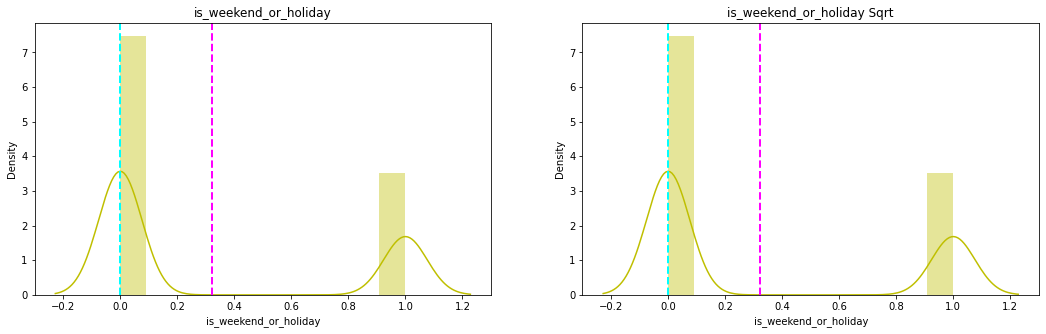

In [ ]:
for col in numeric_features:
    fig, ax = plt.subplots(1, 2, figsize=(18,5))

    sns.distplot(seoul_bike_data1[col],color="y",ax= ax[0])
    ax[0].axvline(seoul_bike_data1[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax[0].axvline(seoul_bike_data1[col].median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax[0].set_title(col)

    sns.distplot(np.sqrt(seoul_bike_data1[col]),color="y",ax= ax[1])
    ax[1].axvline(np.sqrt(seoul_bike_data1[col]).mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax[1].axvline(np.sqrt(seoul_bike_data1[col]).median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax[1].set_title(col + ' Sqrt')
plt.show()

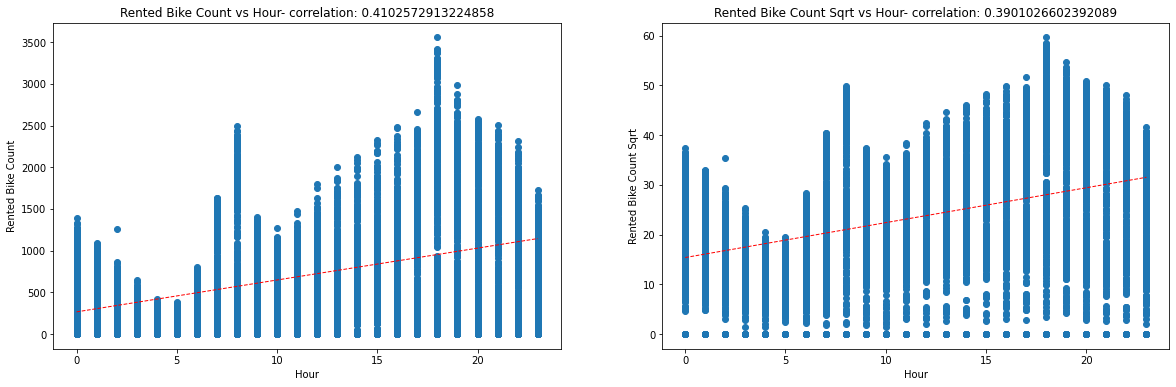

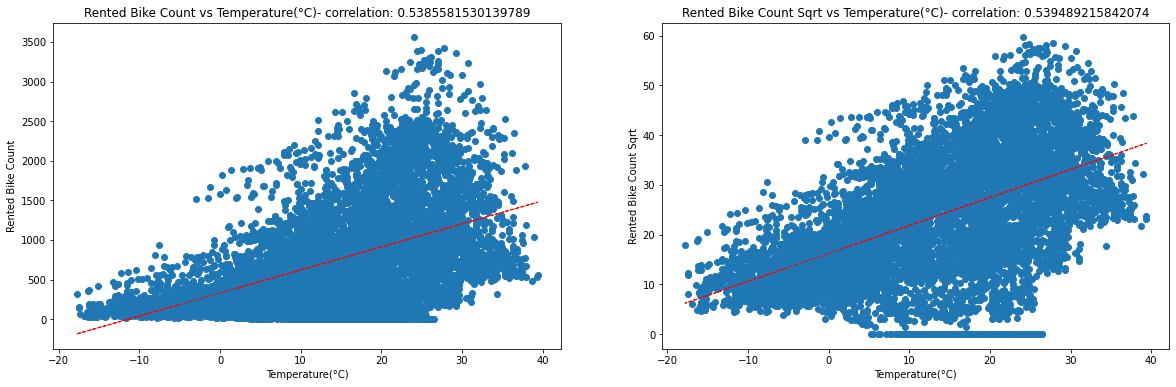

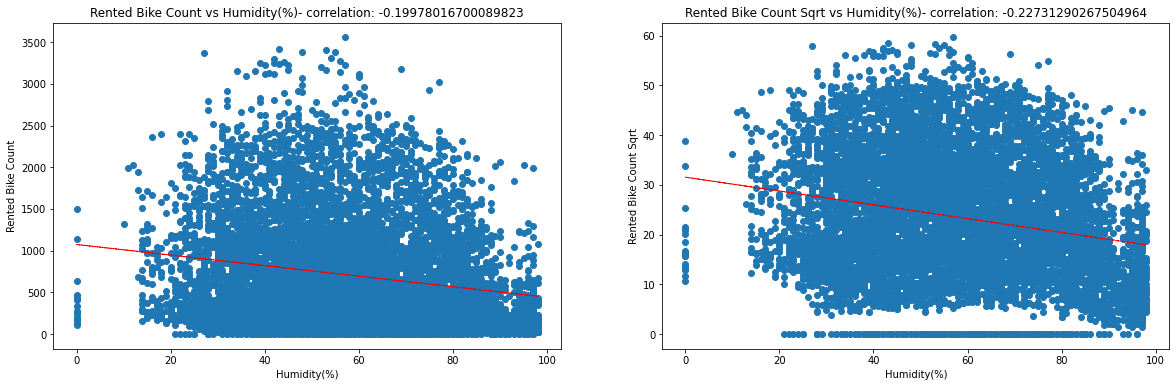

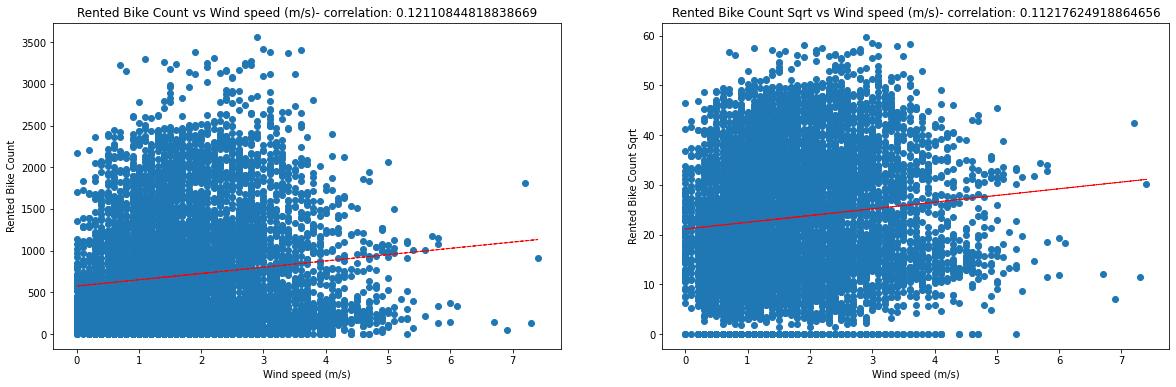

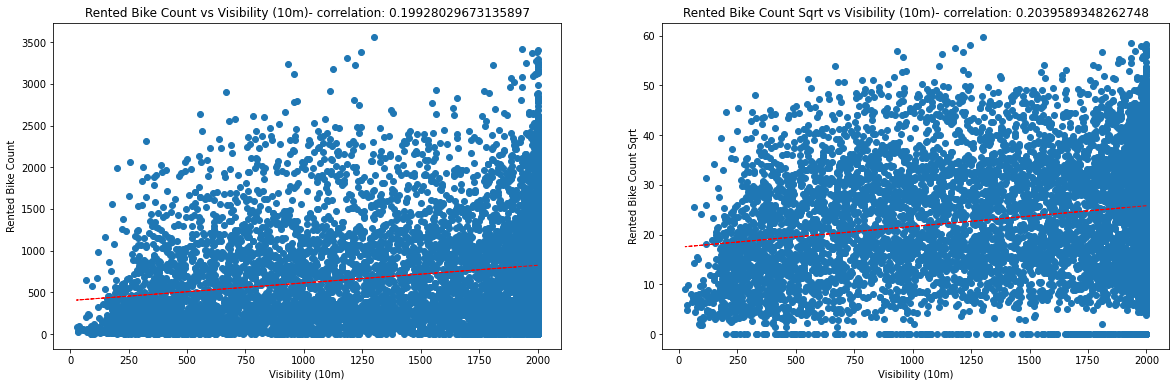

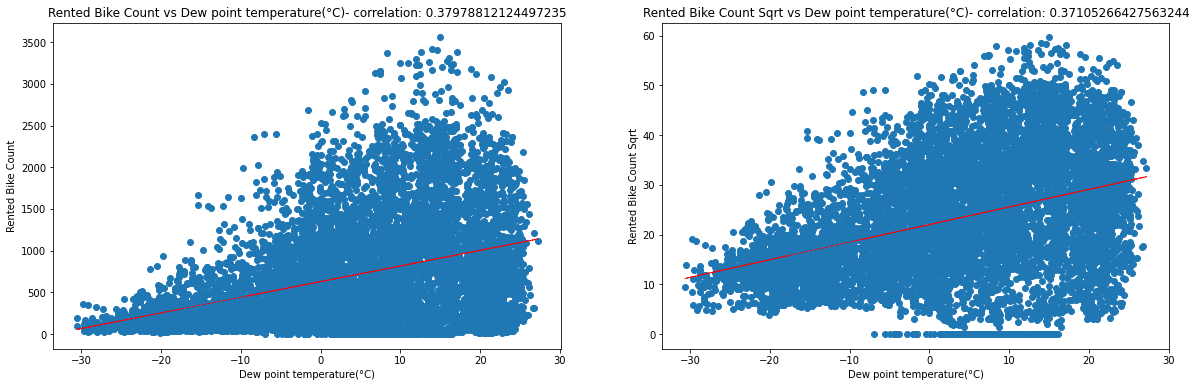

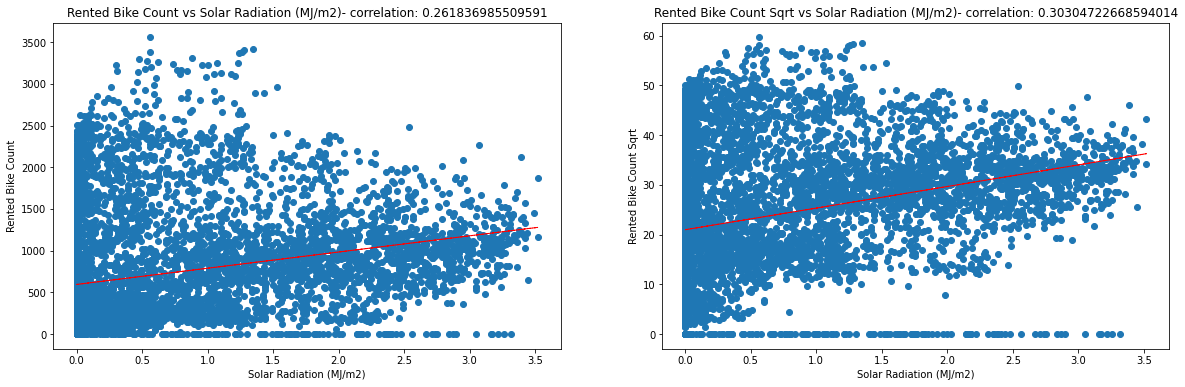

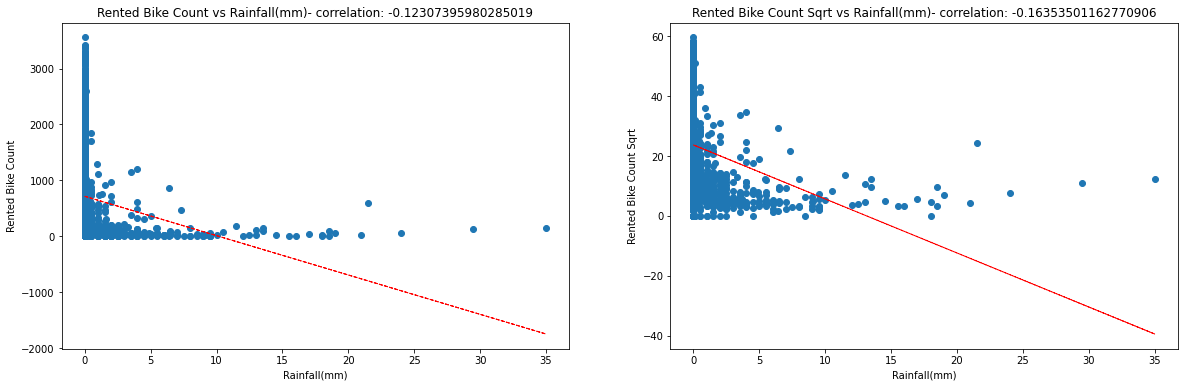

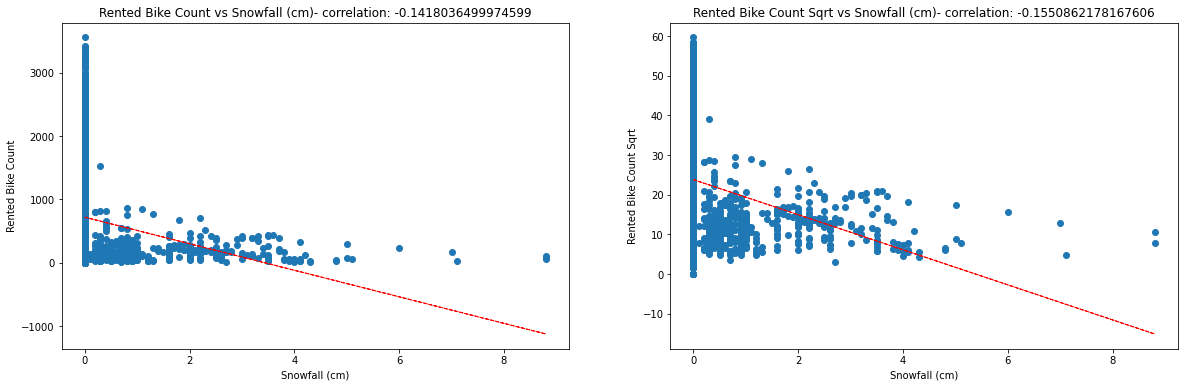

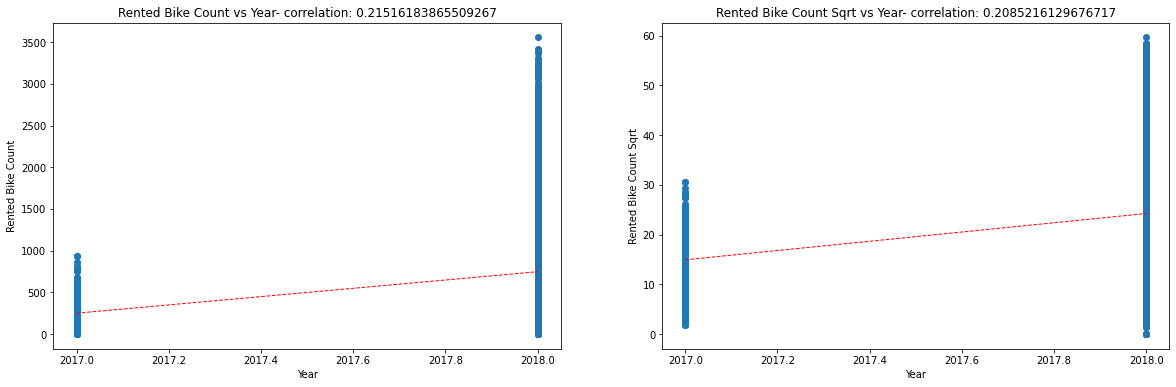

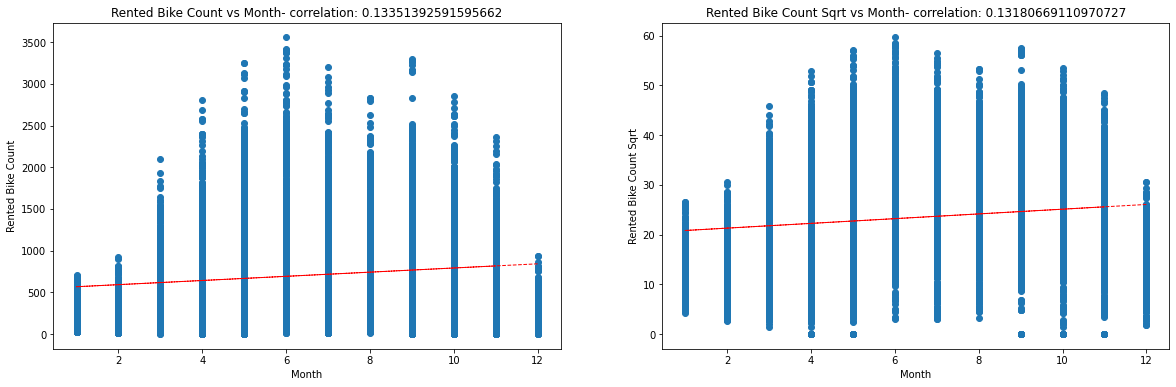

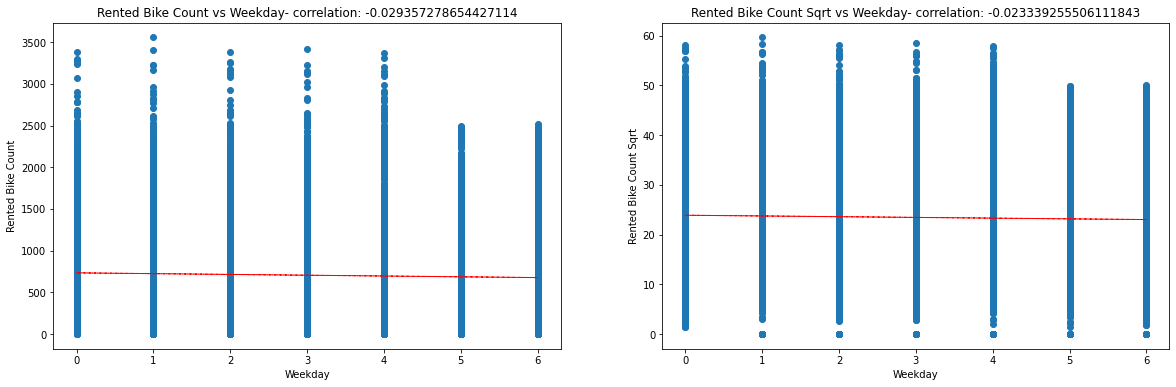

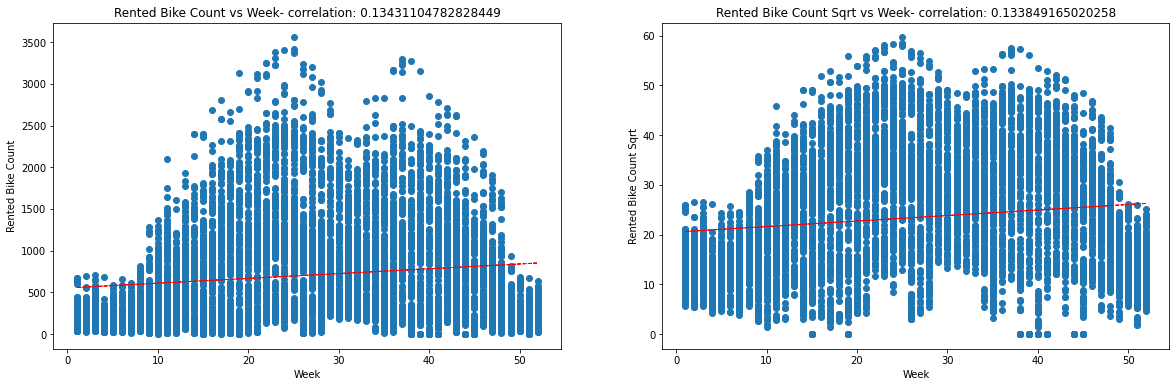

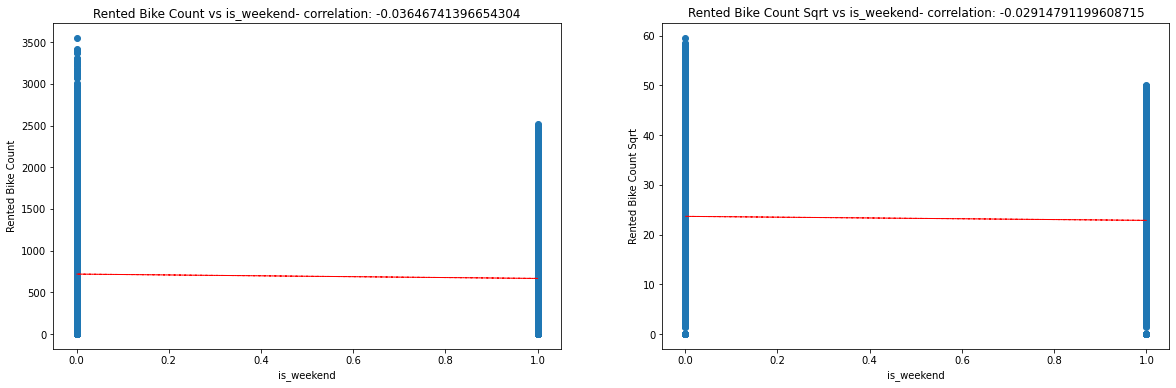

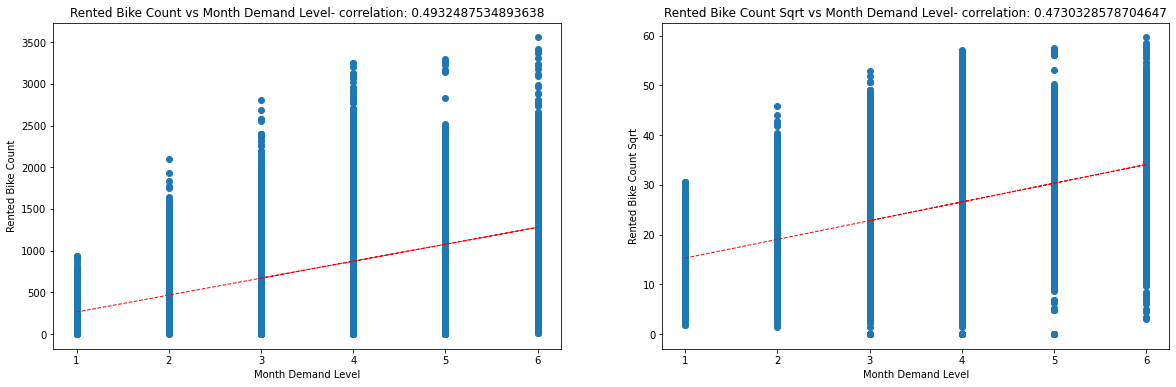

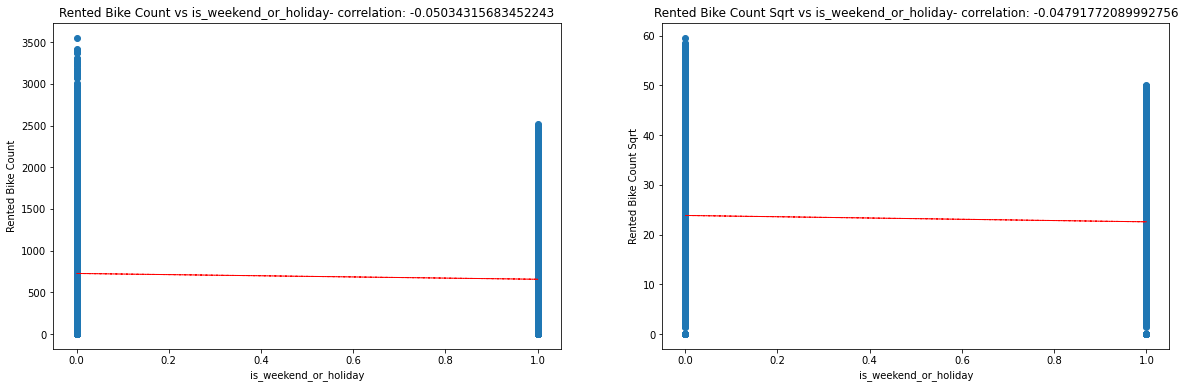

In [ ]:
for col in numeric_features[1:]:
    fig, ax = plt.subplots(1, 2, figsize=(20,6))
    
    feature = seoul_bike_data1[col]
    label1 = (seoul_bike_data1['Rented Bike Count'])
    correlation = feature.corr(label1)
    ax[0].scatter(x=feature, y=label1)
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Rented Bike Count')
    ax[0].set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(seoul_bike_data1[col], (seoul_bike_data1['Rented Bike Count']), 1)
    y_hat = np.poly1d(z)(seoul_bike_data1[col])

    ax[0].plot(seoul_bike_data1[col], y_hat, "r--", lw=1)

    
    label2 = np.sqrt(seoul_bike_data1['Rented Bike Count'])
    correlation = feature.corr(label2)
    ax[1].scatter(x=feature, y=label2)
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('Rented Bike Count Sqrt')
    ax[1].set_title('Rented Bike Count Sqrt vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(seoul_bike_data1[col], np.sqrt(seoul_bike_data1['Rented Bike Count']), 1)
    y_hat = np.poly1d(z)(seoul_bike_data1[col])

    ax[1].plot(seoul_bike_data1[col], y_hat, "r--", lw=1)

plt.show()

In [ ]:
seoul_bike_data1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Weekday,Week,is_weekend
Date_Hour,,,,,,,,,,,,,,,,,,,
2017-12-01 00:00:00,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48,0
2017-12-01 01:00:00,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48,0
2017-12-01 02:00:00,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48,0
2017-12-01 03:00:00,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48,0
2017-12-01 04:00:00,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48,0


In [ ]:
X = seoul_bike_data1.copy()
Y = np.sqrt(seoul_bike_data1['Rented Bike Count']).copy()

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( X,Y , test_size = 0.30,shuffle = True ,random_state = 3) 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6132, 22)
(2628, 22)
(6132,)
(2628,)


In [ ]:
# train set
x_train['Wind speed (m/s) sqrt'] = np.sqrt(x_train['Wind speed (m/s)'])
x_train['Rainfall(mm) sqrt'] = np.sqrt(x_train['Rainfall(mm)'])
x_train['Snowfall (cm) sqrt'] = np.sqrt(x_train['Snowfall (cm)'])
x_train['Solar Radiation (MJ/m2) sqrt'] = np.sqrt(x_train['Solar Radiation (MJ/m2)'])
x_train['Rented Bike Count Sqrt'] = np.sqrt(x_train['Rented Bike Count'])

#test set
x_test['Wind speed (m/s) sqrt'] = np.sqrt(x_test['Wind speed (m/s)'])
x_test['Rainfall(mm) sqrt'] = np.sqrt(x_test['Rainfall(mm)'])
x_test['Snowfall (cm) sqrt'] = np.sqrt(x_test['Snowfall (cm)'])
x_test['Solar Radiation (MJ/m2) sqrt'] = np.sqrt(x_test['Solar Radiation (MJ/m2)'])
x_test['Rented Bike Count Sqrt'] = np.sqrt(x_test['Rented Bike Count'])

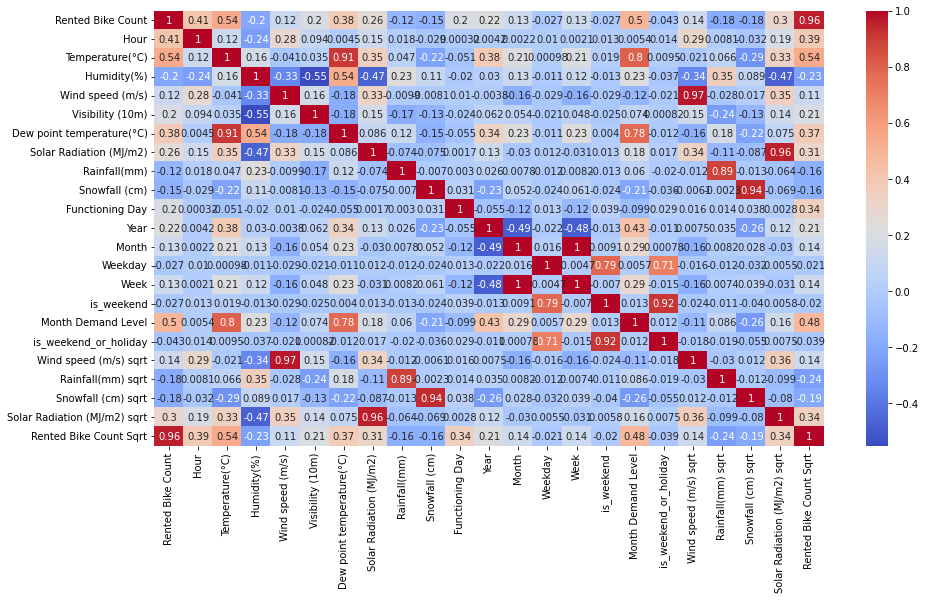

In [ ]:
plt.figure(figsize=(15,8))
correlation = x_train.corr()
sns.heatmap((correlation), annot=True, cmap='coolwarm')

In [ ]:
x_train.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Functioning Day', 'Year', 'Month', 'Weekday', 'Week', 'is_weekend',
       'Month Demand Level', 'is_weekend_or_holiday', 'Wind speed (m/s) sqrt',
       'Rainfall(mm) sqrt', 'Snowfall (cm) sqrt',
       'Solar Radiation (MJ/m2) sqrt', 'Rented Bike Count Sqrt'],
      dtype='object')

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(x_train[[i for i in x_train.describe().columns if i not in ['Rented Bike Count','Rented Bike Count Sqrt','Dew point temperature(°C)', 'Year',
       'Month', 'Weekday', 'Week', 'is_weekend','is_weekend_or_holiday','Wind speed (m/s)','Rainfall(mm)','Snowfall (cm)','Hour','Month Demand Level','Solar Radiation (MJ/m2)','Wind speed (m/s) sqrt','Functioning Day']]])

,variables,VIF
0,Temperature(°C),3.126486
1,Humidity(%),4.414253
2,Visibility (10m),3.728786
3,Rainfall(mm) sqrt,1.187810
4,Snowfall (cm) sqrt,1.187429
5,Solar Radiation (MJ/m2) sqrt,2.078546


In [ ]:
x_train.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Month', 'Weekday', 'Week',
       'is_weekend', 'Month Demand Level', 'hour_window',
       'is_weekend_or_holiday', 'Wind speed (m/s) sqrt', 'Rainfall(mm) sqrt',
       'Snowfall (cm) sqrt', 'Solar Radiation (MJ/m2) sqrt',
       'Rented Bike Count Sqrt'],
      dtype='object')

In [ ]:
num_features = ['Temperature(°C)','Visibility (10m)','Rainfall(mm) sqrt','Snowfall (cm) sqrt','Solar Radiation (MJ/m2) sqrt','Humidity(%)']

In [ ]:
x_train_enc = x_train.copy()

x_train_enc = pd.get_dummies(x_train_enc, columns=["Month Demand Level","hour_window"], 
                            prefix=["Month Demand Level","hour_window"])

x_test_enc = x_test.copy()
x_test_enc = pd.get_dummies(x_test_enc, columns=["Month Demand Level","hour_window"], 
                            prefix=["Month Demand Level","hour_window"])

In [ ]:
x_train_enc.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Month', 'Weekday', 'Week',
       'is_weekend', 'is_weekend_or_holiday', 'Wind speed (m/s) sqrt',
       'Rainfall(mm) sqrt', 'Snowfall (cm) sqrt',
       'Solar Radiation (MJ/m2) sqrt', 'Rented Bike Count Sqrt',
       'Month Demand Level_1', 'Month Demand Level_2', 'Month Demand Level_3',
       'Month Demand Level_4', 'Month Demand Level_5', 'Month Demand Level_6',
       'hour_window_0-2', 'hour_window_12-14', 'hour_window_15-17',
       'hour_window_18-20', 'hour_window_21-23', 'hour_window_3-5',
       'hour_window_6-8', 'hour_window_9-11'],
      dtype='object')

In [ ]:
categorical_features = ['is_weekend_or_holiday','Functioning Day','Month Demand Level_1', 'Month Demand Level_2', 'Month Demand Level_3',
       'Month Demand Level_4', 'Month Demand Level_5', 'Month Demand Level_6',
       'hour_window_0-2', 'hour_window_12-14', 'hour_window_15-17',
       'hour_window_18-20', 'hour_window_21-23', 'hour_window_3-5',
       'hour_window_6-8', 'hour_window_9-11']

In [ ]:
x_train_num = x_train_enc[num_features].copy()
x_train_cat = x_train_enc[categorical_features].copy()

x_test_num = x_test_enc[num_features].copy()
x_test_cat = x_test_enc[categorical_features].copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train_num)

x_train_num = pd.DataFrame(scaler.transform(x_train_num),index = x_train_num.index,columns=x_train_num.columns)
x_test_num = pd.DataFrame(scaler.transform(x_test_num),index = x_test_num.index,columns=x_test_num.columns)

#concat
seoul_x_train = pd.concat([x_train_num, x_train_cat], axis=1, join='inner')
seoul_x_test = pd.concat([x_test_num, x_test_cat], axis=1, join='inner')

In [ ]:
import statsmodels.api as sm

seoul_x_train_cnst = sm.add_constant(seoul_x_train.copy())

model = sm.OLS(y_train, seoul_x_train_cnst).fit()
predictions_train = model.predict(seoul_x_train_cnst) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     961.8
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        12:52:20   Log-Likelihood:                -19783.
No. Observations:                6132   AIC:                         3.961e+04
Df Residuals:                    6111   BIC:                         3.975e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(seoul_x_train, y_train)

In [ ]:
reg.score(seoul_x_train, y_train)

0.7589142673349364

In [ ]:
y_train_pred = reg.predict(seoul_x_train)

r2 = r2_score((y_train)**2, (y_train_pred)**2)
print("R2 train (Linear Regression):" ,r2)

from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_train)**2, (y_train_pred)**2)
print("MSE train (Linear Regression):" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE train (Linear Regression):" ,RMSE)

R2 train (Linear Regression): 0.7217489496726572
MSE train (Linear Regression): 115776.19521099966
RMSE train (Linear Regression): 340.259011946781


In [ ]:
y_test_pred = reg.predict(seoul_x_test)

r2 = r2_score((y_test)**2, (y_test_pred)**2)
print("R2 test (Linear Regression):" ,r2)

from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test)**2, (y_test_pred)**2)
print("MSE test (Linear Regression):" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE test (Linear Regression):" ,RMSE)

R2 test (Linear Regression): 0.701199082349726
MSE test (Linear Regression): 124171.20932676653
RMSE test (Linear Regression): 352.37935428564276


In [ ]:
#ridge
ridge = Ridge()
parameters = {'alpha': [1,1.5,2,2.5,3,3.5]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(seoul_x_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1, 1.5, 2, 2.5, 3, 3.5]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -37.84207994093086


In [ ]:
y_pred_train = ridge_regressor.predict(seoul_x_train)

r2 = r2_score((y_train)**2, (y_pred_train)**2)
print("R2 train:" ,r2)

R2 train: 0.7213484198949203


In [ ]:
y_pred_test = ridge_regressor.predict(seoul_x_test)

r2 = r2_score((y_test)**2, (y_pred_test)**2)
print("R2 test:" ,r2)

R2 test: 0.7008522395886422


In [ ]:
seoul_bike_data2 = seoul_bike_data.copy()

In [ ]:
seoul_bike_data2 = seoul_bike_data2.drop(seoul_bike_data2[ ( seoul_bike_data2['Functioning Day'] == 'No') ].index)
seoul_bike_data2.shape

(8465, 14)

In [ ]:
# tree based models

In [ ]:
seoul_bike_data_tree1 = seoul_bike_data.copy()

In [ ]:
seoul_bike_data_tree1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# feature extraction:

seoul_bike_data_tree1["Date_Hour"] = pd.to_datetime(pd.to_datetime(seoul_bike_data_tree1.Date).dt.strftime('%d/%m/%Y')) #strftime converts date to string, so pd.to_datetime is applied again.

seoul_bike_data_tree1['Date_Hour'] +=  pd.to_timedelta(seoul_bike_data_tree1.Hour, unit='h') # adding hour detail to datetime as per hour given in 'hour' column, using pd.to_timedelta

seoul_bike_data_tree1.set_index('Date_Hour',inplace = True) #setting datetime as index

#extracting various units of time
seoul_bike_data_tree1['Year'] = seoul_bike_data_tree1.index.year
seoul_bike_data_tree1['Month'] = seoul_bike_data_tree1.index.month
seoul_bike_data_tree1['Weekday'] = seoul_bike_data_tree1.index.weekday
seoul_bike_data_tree1['Week'] = seoul_bike_data_tree1.index.week

# replacing holiday with no-holiday for 22/12/2017
seoul_bike_data_tree1["Holiday"] = np.where(seoul_bike_data_tree1["Date"] == "22/12/2017", "No Holiday", seoul_bike_data_tree1["Holiday"])

seoul_bike_data_tree1['Holiday'] = seoul_bike_data_tree1['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)
seoul_bike_data_tree1['Functioning Day'] = seoul_bike_data_tree1['Functioning Day'].apply(lambda x: 1 if x == 'Yes' else 0) 

In [ ]:
seoul_bike_data_tree1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Weekday,Week
Date_Hour,,,,,,,,,,,,,,,,,,
2017-12-01 00:00:00,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,2017,12,4,48
2017-12-01 01:00:00,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,2017,12,4,48
2017-12-01 02:00:00,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,2017,12,4,48
2017-12-01 03:00:00,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,2017,12,4,48
2017-12-01 04:00:00,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,2017,12,4,48


#### we don't need Date column as we have extracted the various date informations and decision tree using every unique date doesn't make sense as we will be forecasting for future. We will also not be using Year column because we only have data for duration of 1 year starting from December 2017 to November 2018.

In [ ]:
#dropping Date and Year column
seoul_bike_data_tree1 = seoul_bike_data_tree1.drop(['Date','Year','Seasons'], axis=1)

In [ ]:
seoul_bike_data_tree1.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,Weekday,Week
Date_Hour,,,,,,,,,,,,,,,
2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,12,4,48


In [ ]:
X = seoul_bike_data_tree1.drop(['Rented Bike Count'], axis=1).copy()
Y = seoul_bike_data['Rented Bike Count'].copy()

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( X,Y , test_size = 0.3,shuffle = True ,random_state = 3) 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6132, 14)
(2628, 14)
(6132,)
(2628,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state = 0) 

In [ ]:
dtr_params = {'max_depth' : [10,11,12] , 'min_samples_split':[9,10,11],'min_samples_leaf': [4,5,6]
                 }

In [ ]:
seoul_dtr_cv= GridSearchCV(estimator=dtr, param_grid = dtr_params, cv = 5)

In [ ]:
seoul_dtr = seoul_dtr_cv.fit(x_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",seoul_dtr.best_estimator_)
print("\n The best score across ALL searched params:\n",seoul_dtr.best_score_)
print("\n The best parameters across ALL searched params:\n",seoul_dtr.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(max_depth=12, min_samples_leaf=4, min_samples_split=9,
                      random_state=0)

 The best score across ALL searched params:
 0.855299508675522

 The best parameters across ALL searched params:
 {'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 9}


In [ ]:
y_train_pred = seoul_dtr.predict(x_train)

In [ ]:
r2 = r2_score((y_train), (y_train_pred))
print("R2 train:" ,r2)

R2 train: 0.9388014473816227


In [ ]:
y_test_pred = seoul_dtr.predict(x_test)

In [ ]:
r2 = r2_score((y_test), (y_test_pred))
print("R2 test:" ,r2)

R2 test: 0.872136335864955


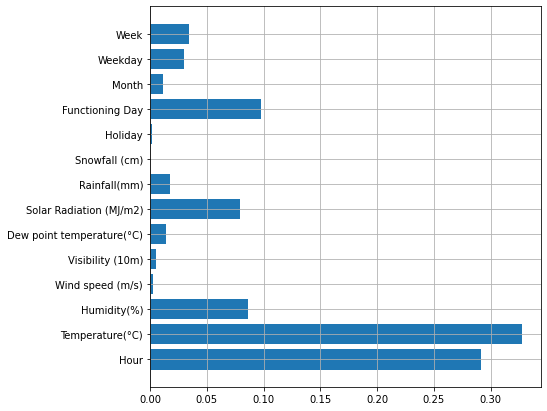

In [ ]:
importance = list(seoul_dtr.best_estimator_.feature_importances_)
plt.figure(figsize = (7,7))
plt.barh(x_train.columns,importance)
plt.grid()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state = 0)

In [ ]:
gbr_params = {'n_estimators' : [105,110,115],'max_depth' : [5,6,7] , 'min_samples_split':[9,10,11], 'min_samples_leaf': [4,5,6], 'max_features':[10,12]
                 }

In [ ]:
seoul_gbr_cv= GridSearchCV(estimator=gbr, param_grid = gbr_params, cv = 5)

In [ ]:
seoul_gbr = seoul_gbr_cv.fit(x_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",seoul_gbr.best_estimator_)
print("\n The best score across ALL searched params:\n",seoul_gbr.best_score_)
print("\n The best parameters across ALL searched params:\n",seoul_gbr.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(max_depth=7, max_features=10, min_samples_leaf=5,
                          min_samples_split=11, n_estimators=115,
                          random_state=0)

 The best score across ALL searched params:
 0.9399319328764018

 The best parameters across ALL searched params:
 {'max_depth': 7, 'max_features': 10, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 115}


In [ ]:
y_pred_train = seoul_gbr.predict(x_train)
y_pred_test = seoul_gbr.predict(x_test)

In [ ]:
r2 = r2_score((y_train)**2, (y_pred_train)**2)
print("R2 train:" ,r2)

r2 = r2_score((y_test)**2, (y_pred_test)**2)
print("R2 test:" ,r2)

R2 train: 0.972895845501236
R2 test: 0.9195868233354068


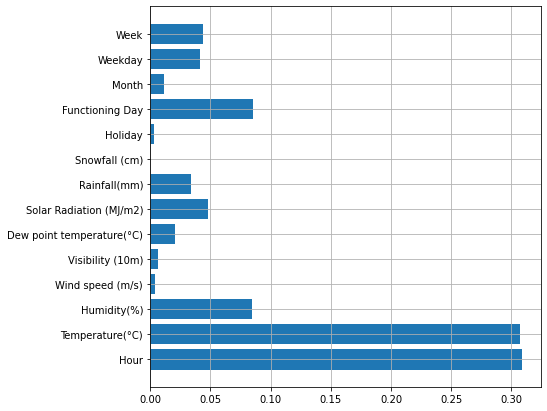

In [ ]:
importance = list(seoul_gbr.best_estimator_.feature_importances_)
plt.figure(figsize = (7,7))
plt.barh(x_train.columns,importance)
plt.grid()

In [ ]:
x_train.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'Month', 'Weekday', 'Week'],
      dtype='object')

In [ ]:
x = zip(seoul_gbr.best_estimator_.feature_importances_, x_train.columns)
print(x)

In [ ]:
len(x_train.columns)

14

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()

In [ ]:
rfg_params = {'n_estimators' : [103,105,107],'max_depth' : [9,10,11] , 'min_samples_split':[8,10,12], 'min_samples_leaf': [4,5,6],'max_features':[10,12]
                 }
seoul_rfg_cv= GridSearchCV(estimator=rfg, param_grid = rfg_params, cv = 4)

In [ ]:
seoul_rfg = seoul_rfg_cv.fit(x_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",seoul_rfg.best_estimator_)
print("\n The best score across ALL searched params:\n",seoul_rfg.best_score_)
print("\n The best parameters across ALL searched params:\n",seoul_rfg.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=11, max_features=12, min_samples_leaf=4,
                      min_samples_split=10, n_estimators=105)

 The best score across ALL searched params:
 0.9047334665590758

 The best parameters across ALL searched params:
 {'max_depth': 11, 'max_features': 12, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 105}


In [ ]:
y_pred_train = seoul_rfg.predict(x_train)
y_pred_test = seoul_rfg.predict(x_test)

In [ ]:
r2 = r2_score((y_train)**2, (y_pred_train)**2)
print("R2 train:" ,r2)

r2 = r2_score((y_test)**2, (y_pred_test)**2)
print("R2 test:" ,r2)

R2 train: 0.8887729196729651
R2 test: 0.8450674095183264


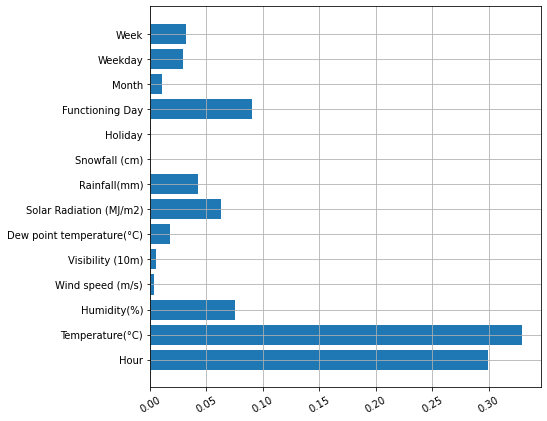

In [ ]:
importance = list(seoul_rfg.best_estimator_.feature_importances_)
plt.figure(figsize = (7,7))
plt.barh(x_train.columns,importance)
plt.xticks(rotation=30)
plt.grid()

In [ ]:
from xgboost import XGBRegressor

xgbr = XGBRegressor(objective ='reg:squarederror')

params = { 'n_estimators' : [106,107,108],'max_depth' : [6,8,10], 'colsample_bytree':[0.7,0.85] }

In [ ]:
xgbr_cv = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   cv=4)

In [ ]:
seoul_xgbr = xgbr_cv.fit(x_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",seoul_xgbr.best_estimator_)
print("\n The best score across ALL searched params:\n",seoul_xgbr.best_score_)
print("\n The best parameters across ALL searched params:\n",seoul_xgbr.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(colsample_bytree=0.85, max_depth=8, n_estimators=108,
             objective='reg:squarederror')

 The best score across ALL searched params:
 0.9408872398808932

 The best parameters across ALL searched params:
 {'colsample_bytree': 0.85, 'max_depth': 8, 'n_estimators': 108}


In [ ]:
y_pred_train = seoul_xgbr.predict(x_train)
y_pred_test = seoul_xgbr.predict(x_test)

In [ ]:
r2 = r2_score((y_train)**2, (y_pred_train)**2)
print("R2 train:" ,r2)

r2 = r2_score((y_test)**2, (y_pred_test)**2)
print("R2 test:" ,r2)

R2 train: 0.9865179754210922
R2 test: 0.9169452707248542


In [ ]:
import plotly.express as px

fig = px.scatter(x=(y_pred_train), y=(y_train), labels = {'x':'Predicted','y':'Actual'}, title = 'Train set Actual vs Predicted', width = 700, height=700)
fig

In [ ]:
fig = px.scatter(x=(y_pred_test), y=(y_test), labels = {'x':'Predicted','y':'Actual'}, title = 'Test set Actual vs Predicted', width = 700, height=700)
fig

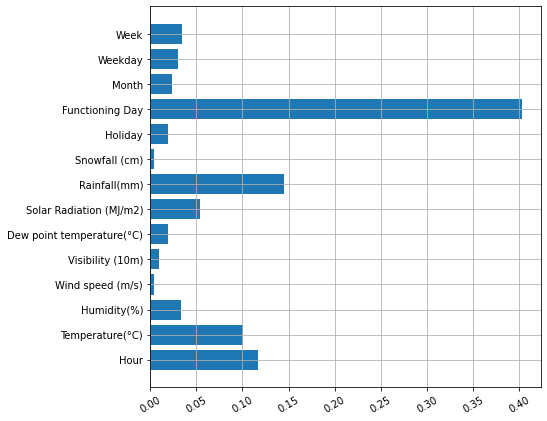

In [ ]:
importance = list(seoul_xgbr.best_estimator_.feature_importances_)
plt.figure(figsize = (7,7))
plt.barh(x_train.columns,importance)
plt.xticks(rotation=30)
plt.grid()